In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/c/titanic/data')

100%|██████████████████████████████████████████████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 450kB/s]


Extracting archive .\titanic/titanic.zip to .\titanic


In [4]:
import os
os.chdir('titanic')

In [5]:
os.listdir()

['.ipynb_checkpoints', 'gender_submission.csv', 'test.csv', 'train.csv']

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [115]:
sns.set(rc = {'figure.figsize': (10, 8)})

### About Data


| **Variable**  | **Definition**                                       | **Key**                          |
|---------------|------------------------------------------------------|----------------------------------|
| survival      | Survival                                             | 0 = No, 1 = Yes                 |
| pclass        | Ticket class                                         | 1 = 1st, 2 = 2nd, 3 = 3rd       |
| sex           | Sex                                                  |                                  |
| Age           | Age in years                                         |                                  |
| sibsp         | # of siblings / spouses aboard the Titanic           |                                  |
| parch         | # of parents / children aboard the Titanic           |                                  |
| ticket        | Ticket number                                        |                                  |
| fare          | Passenger fare                                       |                                  |
| cabin         | Cabin number                                         |                                  |
| embarked      | Port of Embarkation                                  | C = Cherbourg, Q = Queenstown, S = Southampton |


# Merging Train and Test Datasets for Visualization

In this section, we will merge the training and testing datasets to facilitate better visualization and analysis. The merging process allows us to analyze patterns, trends, and insights across both datasets.

## Step 1: Load Required Libraries

In [30]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
df_test = pd.read_csv('test.csv')
df_sur = pd.read_csv('gender_submission.csv')

## Step 2: Merging the Data and Labels of `df_test`

In [39]:
df_test['Survived'] = df_sur['Survived']
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


Insert `Survived` column to index 1 as in `df_train`

In [40]:
col = df_test.pop('Survived')
df_test.insert(1, 'Survived', col)
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Step 3: Concat Train and Test set

In [41]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 4: Save file for future uses

In [50]:
df.to_csv('full_titanic.csv', index = False)

---
# Analysis of full data
---

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


---

🚨 **Insight Alert:** The **`Cabin`** column reveals a significant issue with **1014 missing values**, which we can safely drop. However, the **`Age`** column, with **263 missing values**, is crucial for analyzing survival rates across age groups, making it essential to handle these missing values thoughtfully! 🧑‍🦳👶

--- 

In [55]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [57]:
df.shape

(1309, 12)

---
## Data preprocessing
#### Dropped the column `cabin`

We will do further analysis on this new `DataFrame`

---

In [69]:
df1 = df.drop(columns = ['Cabin'])
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 112.6+ KB


---

We can safely drop all rows with the null values

---

In [71]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

In [72]:
df2 = df1.copy()
df2.dropna(inplace=True, axis = 0);
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 0 to 1306
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1043 non-null   int64  
 1   Survived     1043 non-null   int64  
 2   Pclass       1043 non-null   int64  
 3   Name         1043 non-null   object 
 4   Sex          1043 non-null   object 
 5   Age          1043 non-null   float64
 6   SibSp        1043 non-null   int64  
 7   Parch        1043 non-null   int64  
 8   Ticket       1043 non-null   object 
 9   Fare         1043 non-null   float64
 10  Embarked     1043 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 97.8+ KB


In [123]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


---
## Exploratory Data Analysis

After dropping rows with missing values

---

---

🌟 **Survival Insight:** The data clearly shows that the survival rate of **Females** surpasses that of **Males**! 🚺📈 This highlights the significant impact of gender on survival outcomes in our analysis. 

---

In [74]:
df2['Sex'].value_counts()

Sex
male      657
female    386
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

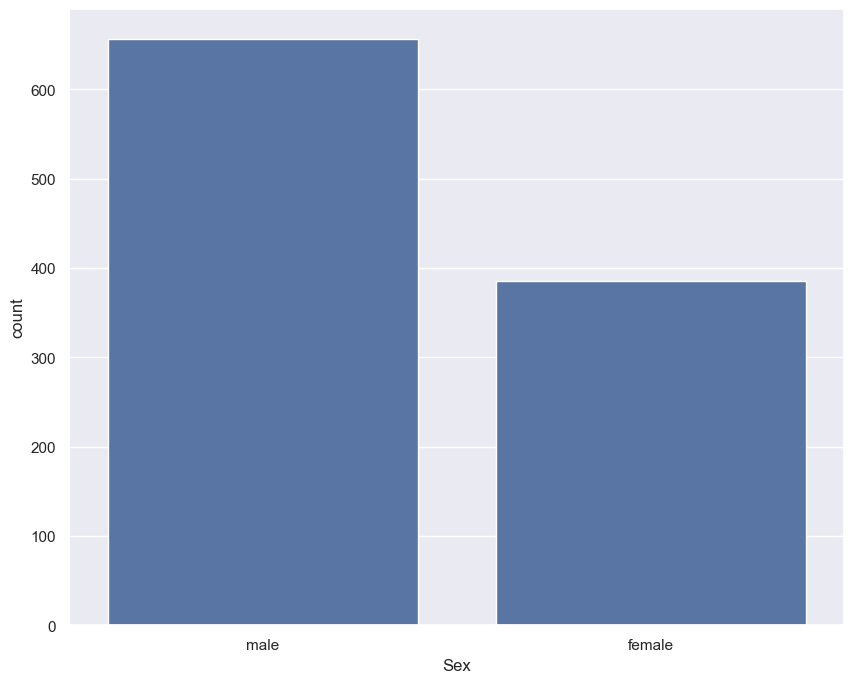

In [116]:
sns.countplot(x = 'Sex', data = df2)

In [83]:
pd.crosstab(index = df2['Sex'],
           columns = df2['Survived'])

Survived,0,1
Sex,,
female,64,322
male,564,93


In [103]:
pd.crosstab(index = df2['Sex'],
           columns = df2['Survived'],
           margins = True,
           normalize = 'index')

Survived,0,1
Sex,,
female,0.165803,0.834197
male,0.858447,0.141553
All,0.602109,0.397891


<Axes: xlabel='Sex', ylabel='count'>

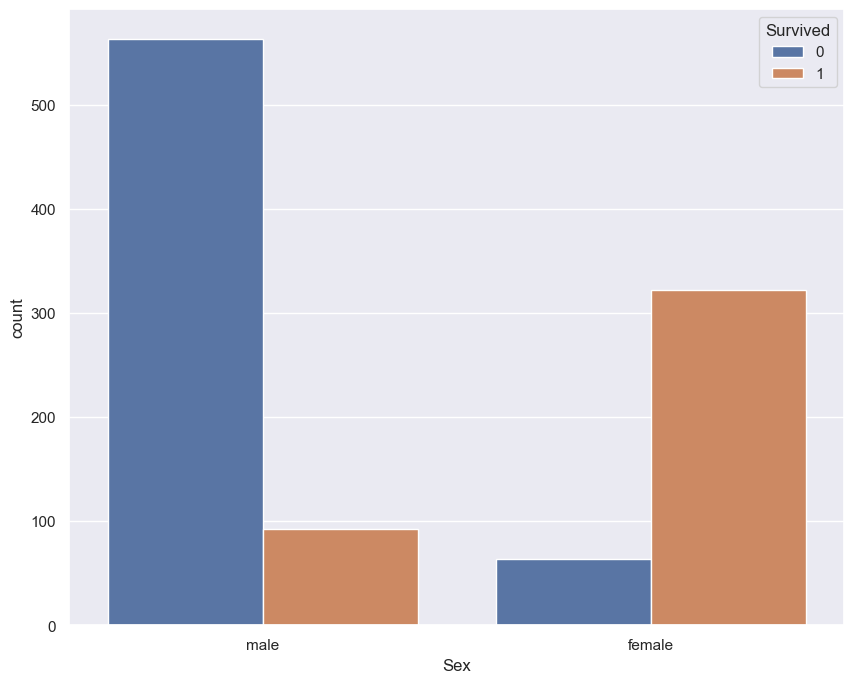

In [117]:
sns.countplot(x = 'Sex', hue='Survived', data = df2)

<Axes: xlabel='Sex', ylabel='Survived'>

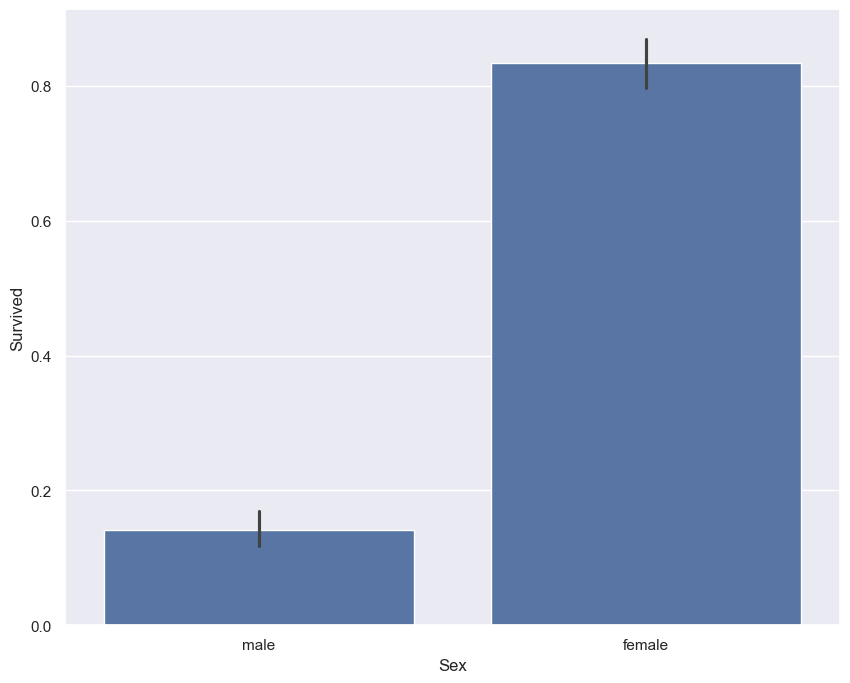

In [118]:
sns.barplot(x='Sex', y='Survived', data=df2)

---

📊 **Age Distribution Analysis:** Upon analyzing the age distribution of passengers, we observe a notable concentration of individuals in the **20 to 30 age group**! 🎉 This highlights a key demographic trend among the Titanic passengers.

--- 

<Axes: xlabel='Age', ylabel='Count'>

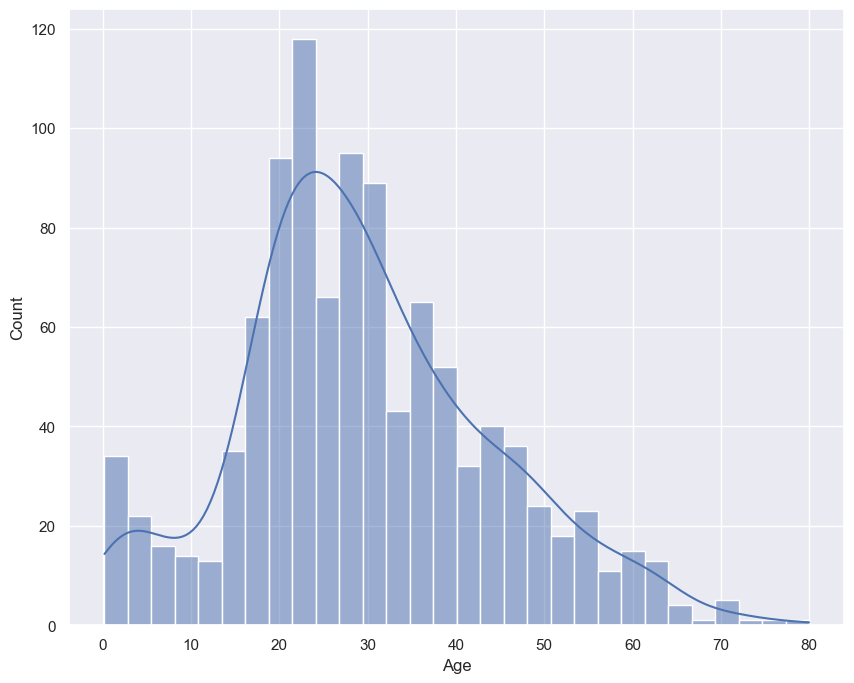

In [119]:
sns.histplot(x = 'Age', data = df2, bins = 30, kde = True)

---

### 📊 Age and Survival Analysis

- **Median Age**: 
  - The median age of **Survivors** is approximately **27-28 years**, while for **Non-Survivors**, it remains around **27-28 years**. This suggests that **younger passengers** had a slightly higher chance of survival! 🧒✨

- **Interquartile Range (IQR)**:
  - The IQR of **Survivors** ranges from **19 to 37 years**, which is narrower compared to the **Non-Survivors**, whose IQR spans **21 to 39 years**. This indicates that most survivors were clustered around a specific age range! 📈

- **Outliers**:
  - A significant number of **outliers** in the **Non-Survivor** group, particularly among older ages, may suggest that **age played a crucial role** in survival outcomes. ⏳🔍

---

<Axes: xlabel='Survived', ylabel='Age'>

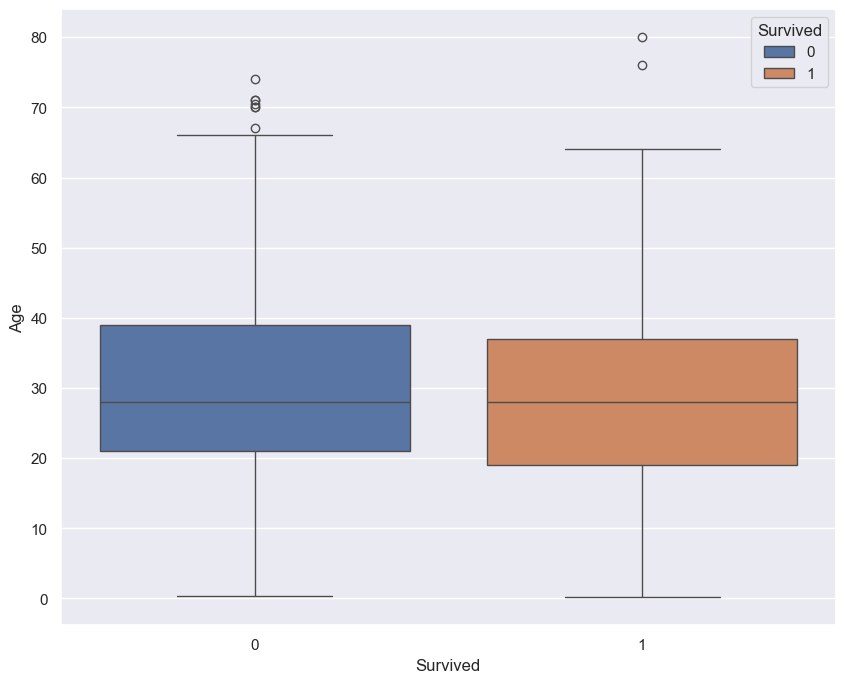

In [121]:
sns.boxplot(x = 'Survived', y = 'Age', data = df2, hue='Survived', )

### 🚢 **Passenger Distribution by Class & Gender**

In [127]:
pd.crosstab(index = df2['Pclass'],
           columns = df2['Sex'],
           normalize = False)

Sex,female,male
Pclass,,
1,131,151
2,103,158
3,152,348




### **Key Insights**:

- **1st Class**: Fairly balanced with a slight male majority.
- **2nd Class**: Noticeably more men, **~55% male**.
- **3rd Class**: Dominated by men, **more than double** the females.

### **Takeaways**:
- 🚹 **Males** outnumber **females**, especially in **3rd class**, reflecting socio-economic factors and possible work/emigration purposes.
- 🚨 **Survival Hint**: Given females had higher survival rates, this male dominance, particularly in 3rd class, may have impacted overall survival chances.


<Axes: xlabel='Pclass', ylabel='count'>

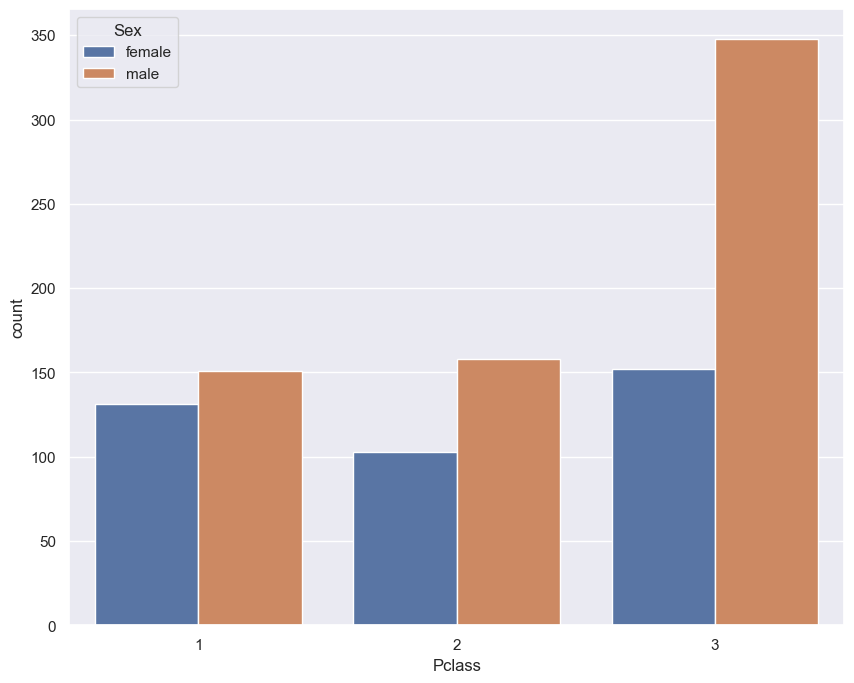

In [124]:
sns.countplot(x = 'Pclass', hue = 'Sex', data = df2)

---

### 🚢 **Correlation Matrix Insights**

#### **Key Correlations**:

| **Feature Pair**                | **Correlation Coefficient** | **Interpretation**                                         |
|----------------------------------|-----------------------------|-----------------------------------------------------------|
| **Survived vs Pclass**          | `-0.279`                    | Passengers in higher classes (lower class number) had a better chance of survival. |
| **Survived vs Fare**            | `0.238`                     | Passengers who paid higher fares had a greater likelihood of survival, likely due to being in higher classes. |
| **Pclass vs Age**               | `-0.409`                    | Older passengers tended to be in lower classes.           |
| **Pclass vs Fare**              | `-0.565`                    | A strong negative correlation, indicating that higher class passengers paid higher fares. |
| **SibSp vs Parch**              | `0.374`                     | Passengers traveling with siblings/spouses also often traveled with parents/children. |

---

### **Key Takeaways**:
- **Class and Fare** significantly influenced survival chances.
- **Older passengers** were predominantly in lower classes, impacting their survival rates.
- **Family Size** (measured by SibSp and Parch) indicates that families traveled together, which may have affected survival outcomes.

---

<Axes: >

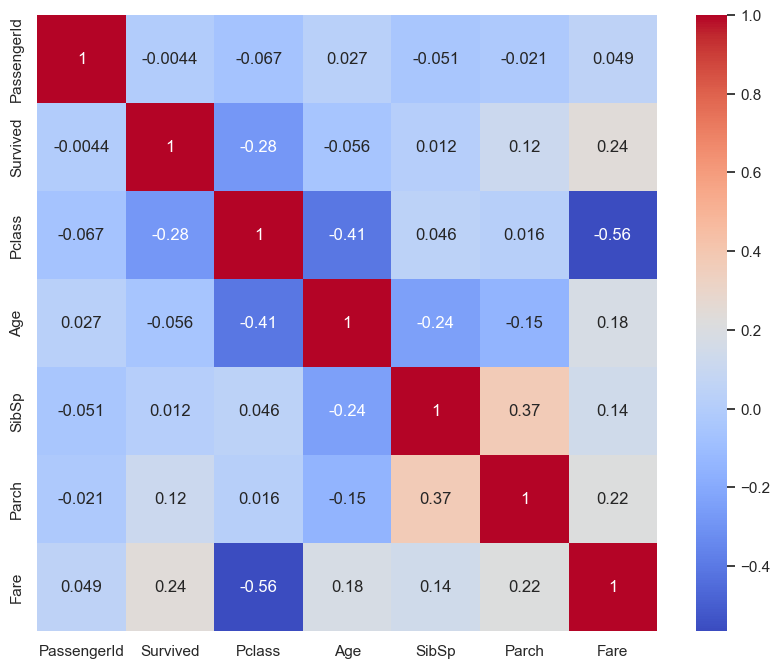

In [141]:
num_df = df2.select_dtypes([float, int])
cor = num_df.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')

---

### 🚢 **Analysis of Age Distribution by Gender and Passenger Class**

#### **Objective**
This analysis explores the age distribution of Titanic passengers, categorized by gender and passenger class (Pclass), to uncover trends that may relate to survival rates.

---

#### **Key Findings**

- **Age Distribution**:
  
  - **Males**:
    - The age distribution for males shows a **broad range**, with a notable concentration of passengers aged between **20 and 40 years**.
    - In **3rd Class**, there is a significantly higher number of younger males, indicating that many men traveling in this class were likely of working age, reflecting socio-economic factors.

  - **Females**:
    - The female age distribution is slightly more skewed towards **younger ages**, particularly in **1st and 2nd Class**.
    - This suggests that families may have traveled together, or that women of childbearing age were more likely to be in the upper classes.

- **Class Breakdown**:
  
  - **1st Class**: 
    - Both genders exhibit an age distribution that tends to be older, with a larger proportion of passengers in their **30s to 50s**. This reflects established social structures among wealthier passengers.
  
  - **2nd Class**: 
    - The distribution is more balanced, with a mix of younger and older passengers, indicating a diverse demographic.
  
  - **3rd Class**: 
    - The majority of younger males and a notable number of young females suggest that working-class demographics often traveled together as families.

---

#### **Implications for Survival**

- **Survival Insights**:
  - Given that women generally had higher survival rates, the greater number of younger females in the upper classes could have contributed positively to their survival chances.
  - In contrast, the predominance of younger males in the lower classes (especially 3rd Class) may indicate that they faced more obstacles during the evacuation process, negatively impacting their survival rates.

---

#### **Visual Representation**

- **Graphs**: 
  - The following histograms illustrate the age distributions for both male and female passengers across different classes. Notice how the peaks shift based on class, especially for males in 3rd Class and females in 1st Class.

---

#### **Summary**

This analysis highlights important trends related to gender and socioeconomic class, providing insights into factors that may have influenced survival during the tragic event of the Titanic disaster.

Understanding these age distributions enhances our comprehension of the dynamics at play during the Titanic voyage, showcasing the intricate relationships between age, gender, and class in historical contexts.

--- 

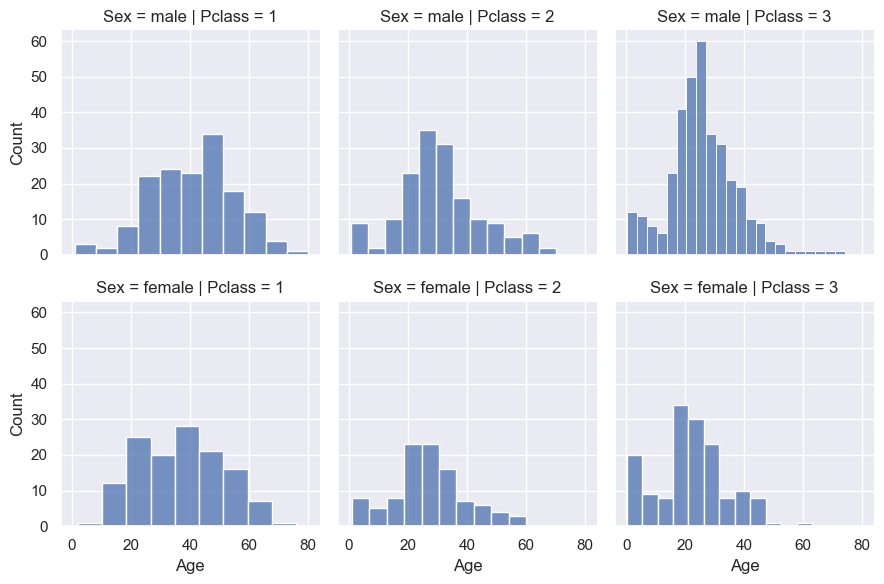

In [143]:
g = sns.FacetGrid(df2, col='Pclass', row='Sex')
g.map(sns.histplot, 'Age')

---
### 🚢 **Age and Survival Analysis of Titanic Passengers**

#### 🔍 **Key Observations from Violin Plot Analysis**

**Non-Survivors (0, Blue)**:
- The **widest section** of the violin plot is around the **20-40 age range**, indicating a significant number of passengers in this age group did not survive.
- There is a **thinner tail** as age increases, suggesting fewer older passengers were among the non-survivors.

- **Survivors (1, Orange)**:
    - The plot reveals a **higher concentration** of younger passengers (under 20) who survived, evident from the **wider section** of the orange plot in this age range. This indicates that **children had a higher chance of survival**.
    - The violin is also relatively wide in the **20-40 age range**, but thinner compared to non-survivors, indicating that fewer individuals in this age group survived.
    - As age increases, the plot **thins out**, showing a decline in the number of elderly survivors.

- **Median Age**:
    - The **white line** within each plot signifies the **median age** for each group:
      - Non-survivors have a **median age** slightly higher than that of survivors.
      - Survivors tend to be **younger overall**, with a more noticeable distribution of **children and young adults** surviving compared to non-survivors.

- **Summary**
These observations highlight the significant impact of age on survival rates during the Titanic disaster, emphasizing the vulnerability of younger passengers and the relative risk faced by older individuals.

---


<Axes: xlabel='Survived', ylabel='Age'>

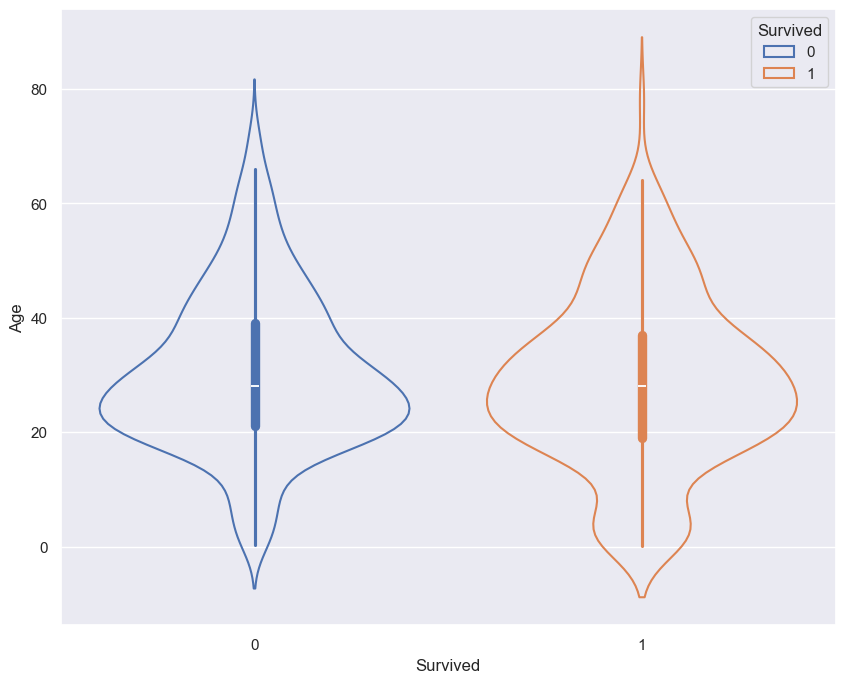

In [153]:
sns.violinplot(x='Survived', y='Age', data=df2, hue='Survived', fill=False)

---
### 📊 **Pair Plot Analysis of the Titanic Dataset**

- 📈 **Key Insights**
    - **Survivor Distribution**: Younger passengers (under 20) show higher survival rates.
    - **Fare Correlation**: Passengers who paid higher fares tended to survive more frequently.
    - **Age and Fare Relationship**: The plot indicates whether younger passengers paid lower or higher fares.

-📊 **Summary**
The pair plot effectively reveals interactions between features, helping us understand the factors influencing survival outcomes in the Titanic disaster.


---

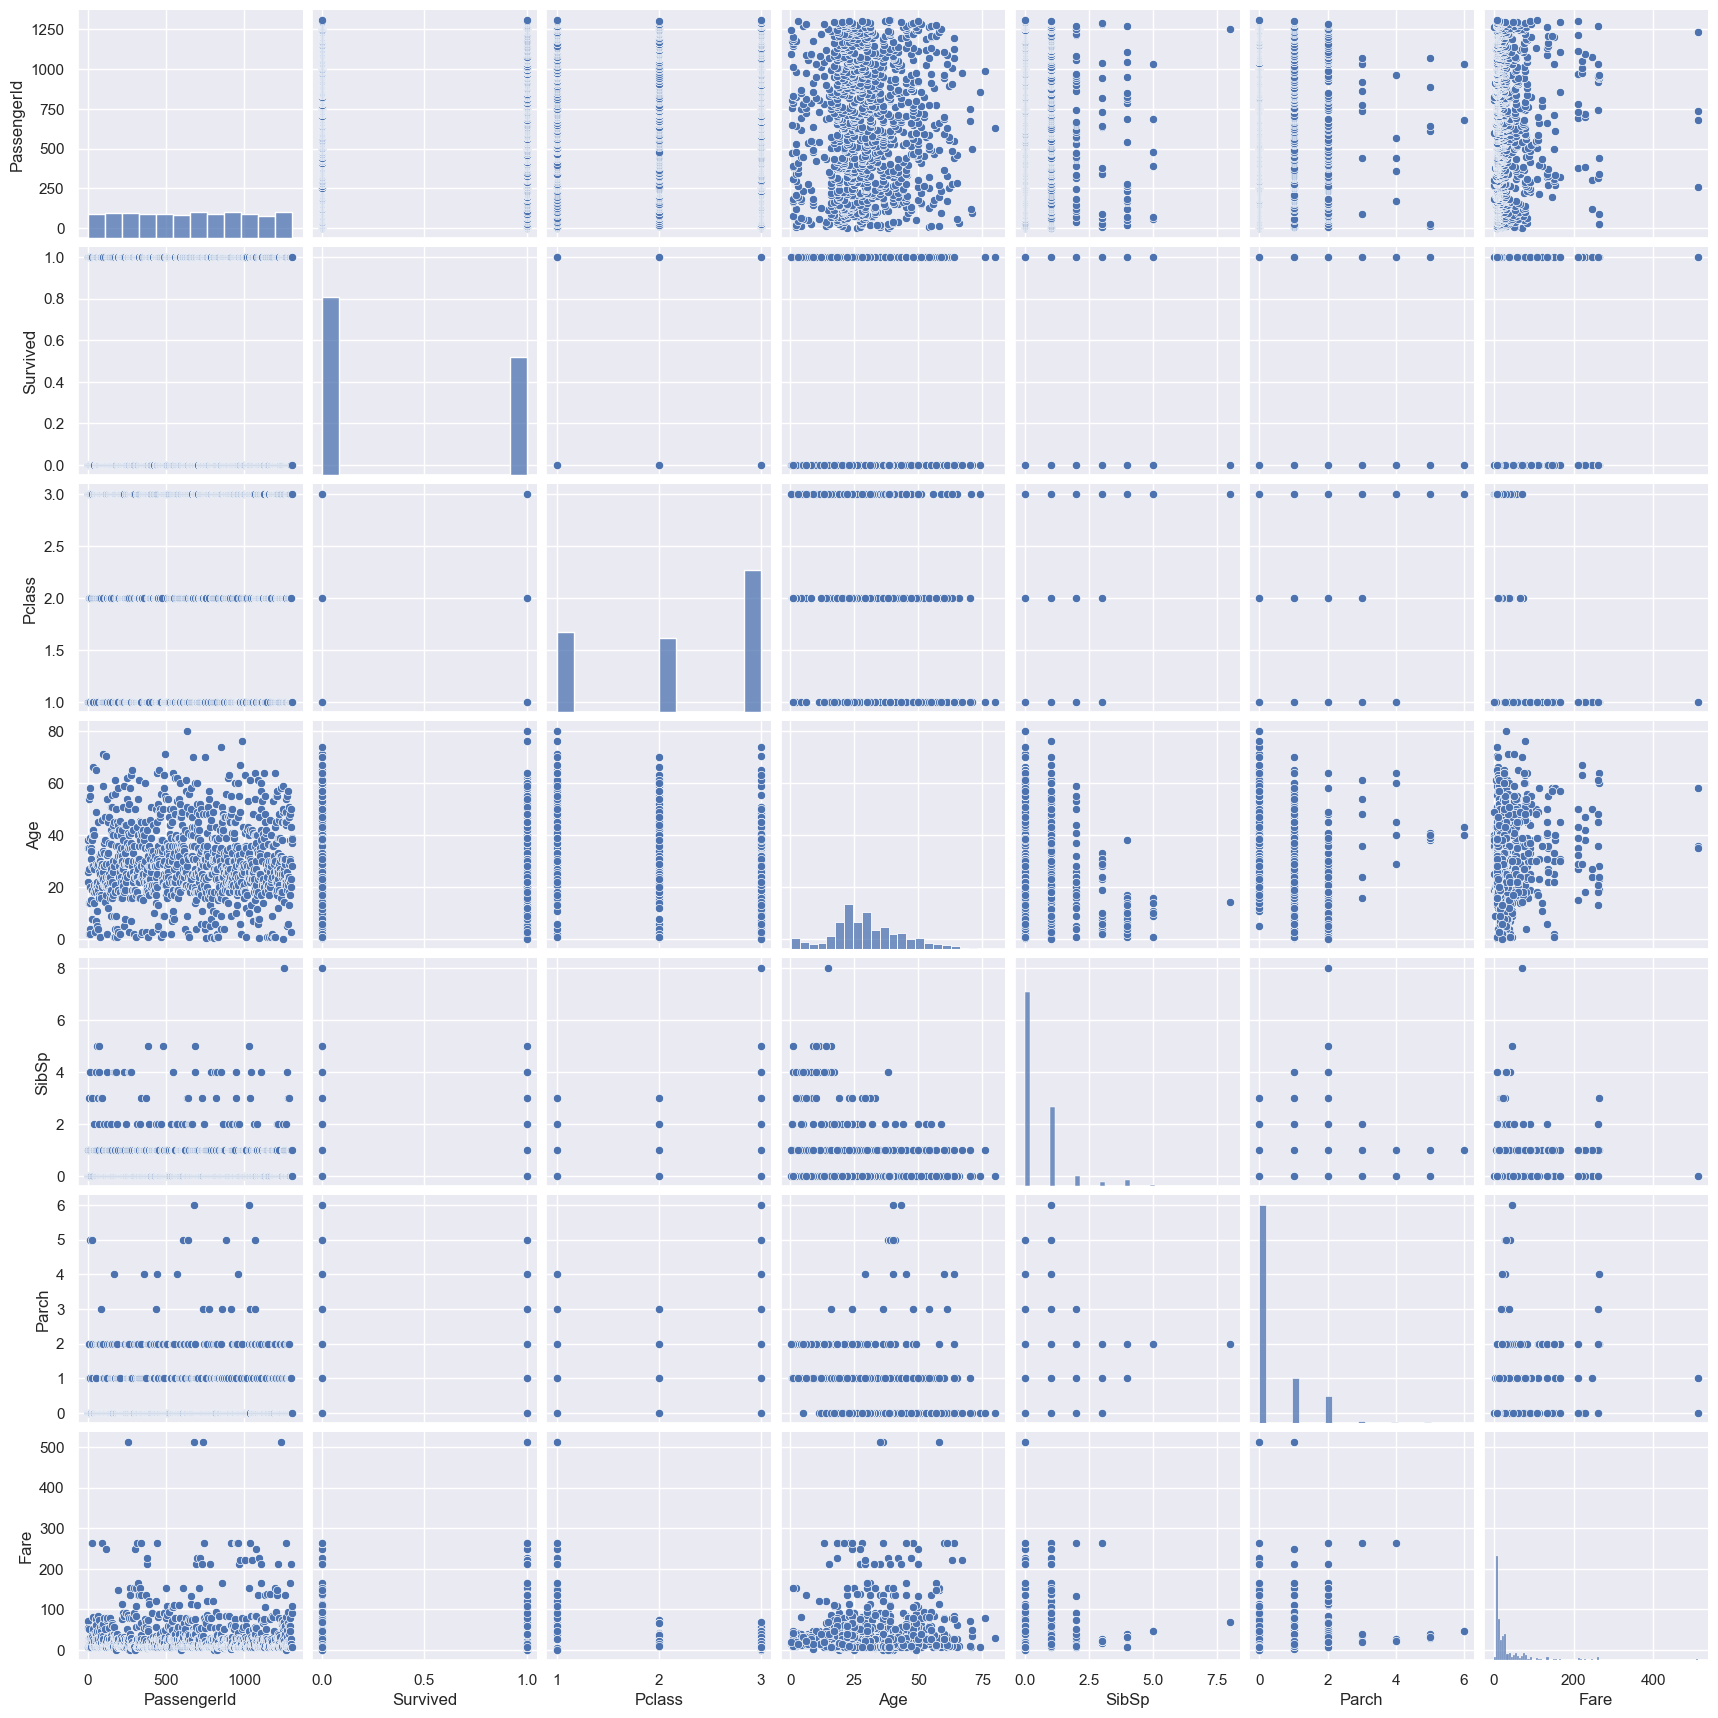

In [163]:
sns.pairplot(df2)

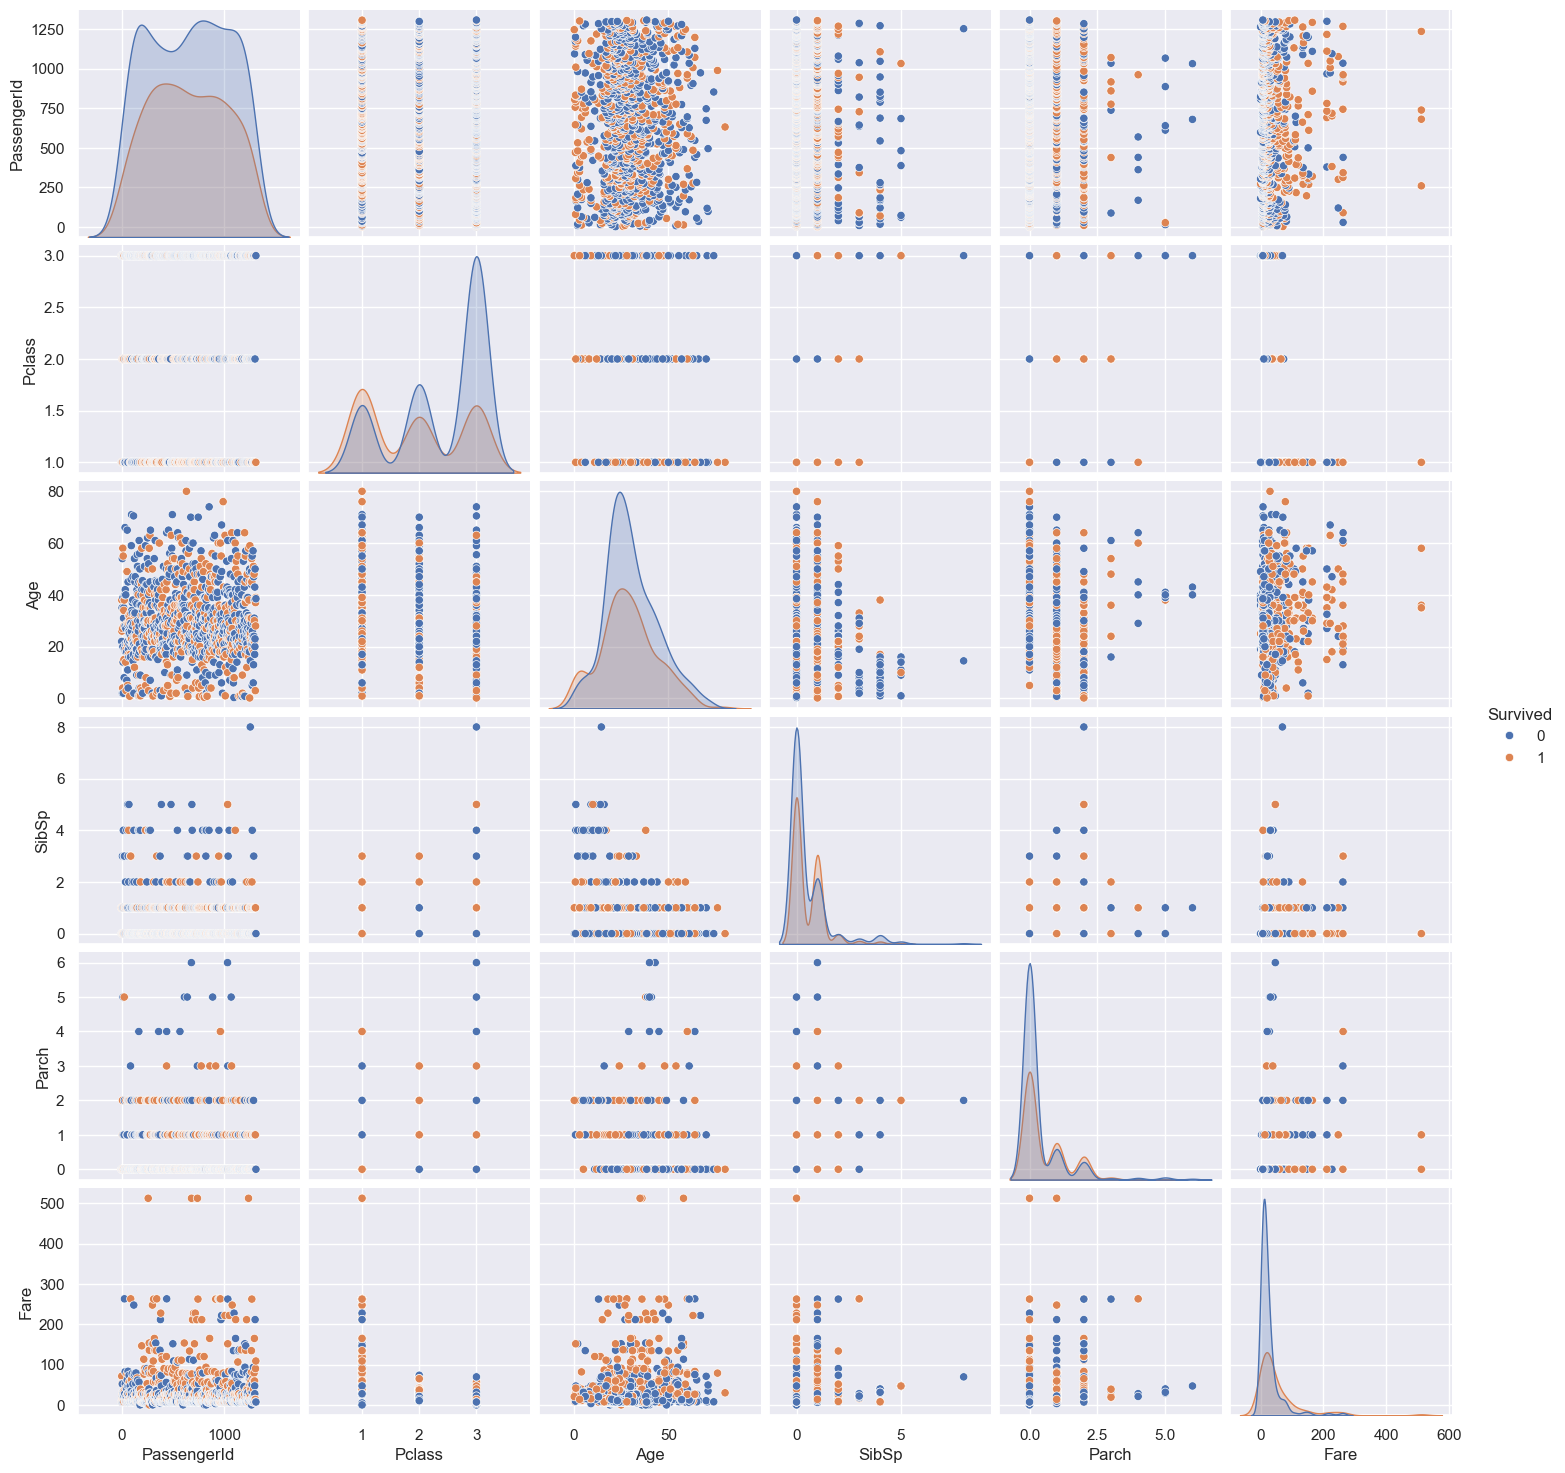

In [160]:
sns.pairplot(df2, hue='Survived')

---
### 📊 **Passenger Count by Family Size (Parch) in the Titanic Dataset**



In [184]:
df['Parch'].value_counts()

Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64

- **0**: 1002 passengers had no parents or children aboard.
- **1**: 170 passengers had one parent or child aboard.
- **2**: 113 passengers had two parents or children aboard.
- **3**: 8 passengers had three parents or children aboard.
- **4**: 6 passengers had four parents or children aboard.
- **5**: 6 passengers had five parents or children aboard.
- **6**: 2 passengers had six parents or children aboard.
- **9**: 2 passengers had nine parents or children aboard.

### **Interpretation:**
- The majority of passengers (1002) traveled without any parents or children.
- There are significantly fewer passengers with larger family groups, suggesting that most individuals were traveling alone or with one or two family members.
  
This information can help analyze the survival rates based on family presence, as passengers with family might have different survival outcomes compared to those traveling alone.

---

---
### 🛳️ **Survival Analysis Based on Family Size (Parch)**

#### **Survival Counts by Number of Parents/Children (Parch)**

In [183]:
pd.crosstab(index = df2['Parch'],
           columns = df2['Survived'],
           normalize = False)

Survived,0,1
Parch,,
0,502,263
1,71,89
2,41,56
3,3,5
4,4,1
5,5,1
6,2,0





- **Key Insights**:

    - **No Parents/Children (Parch = 0)**: 
      - The majority of passengers (502) did not survive, while 263 survived. This indicates that being alone did not significantly increase survival chances.

    - **One Parent/Child (Parch = 1)**: 
      - A total of 71 did not survive, while 89 survived, showing a slight advantage in survival for those with one parent or child.

    - **Two Parents/Children (Parch = 2)**: 
      - The numbers are more balanced, with 41 not surviving and 56 surviving, suggesting a positive correlation between having family and survival.

    - **Three Parents/Children (Parch = 3)**: 
      - Only 3 non-survivors compared to 5 survivors, indicating that having three family members aboard slightly favors survival.

    - **Four to Six Parents/Children (Parch ≥ 4)**: 
      - The survival rates drop dramatically, with only a few passengers, highlighting the rarity of larger family groups and their overall lower chances of survival.

- **Takeaway**:
The analysis indicates a nuanced relationship between family size and survival rates. While larger families are less common among the data, the presence of at least one parent or child seems to correlate with higher survival odds. However, the majority of passengers traveling alone had significantly lower survival chances, suggesting that family connections may have played a role in navigating the crisis during the sinking of the Titanic.


<Axes: xlabel='Parch', ylabel='count'>

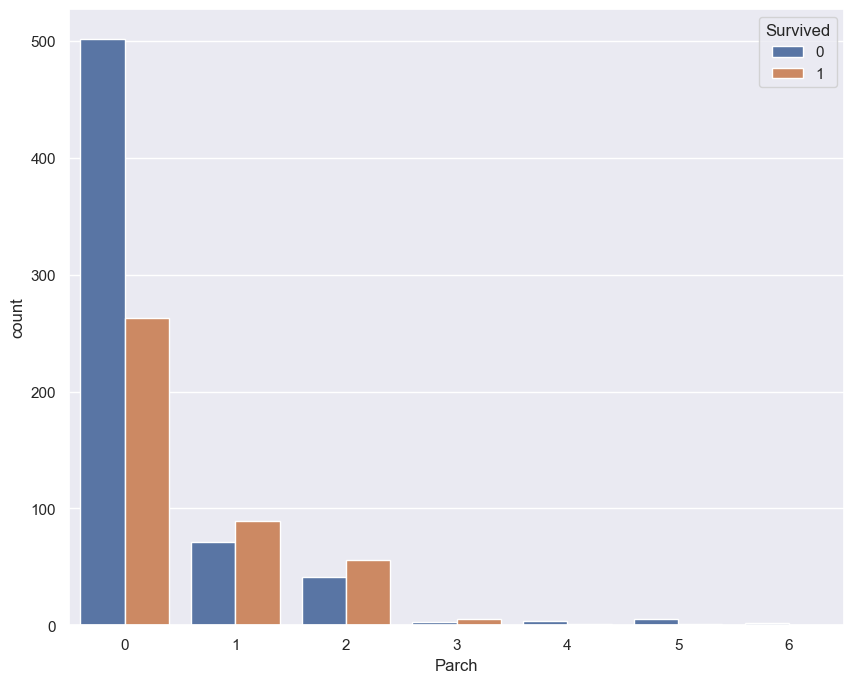

In [177]:
sns.countplot(x='Parch', hue='Survived', data=df2)

---
---
### 📊 **Passenger Count by Sibling/Spouse (SibSp) in the Titanic Dataset**

In [171]:
df['SibSp'].value_counts

SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

- **Key Insights**:

    - **Majority of Passengers (SibSp = 0)**: 
      - Most passengers (891) were traveling alone without any siblings or spouses.

    - **Small Families (SibSp = 1 or 2)**: 
      - A considerable number of passengers had one sibling/spouse (319), followed by a much smaller count of passengers with two siblings/spouses (42).

    - **Larger Families (SibSp ≥ 3)**: 
      - Very few passengers had larger family groups with 20 having three siblings/spouses, 22 with four, and only a handful with five or more.

- **Takeaway**:
The vast majority of Titanic passengers were traveling either alone or with only one family member (sibling or spouse). This distribution provides insight into the family structures on board and may offer further clues when analyzing survival rates based on family size.

---

---
### 🚢 **Survival Based on Sibling/Spouse Count (SibSp) in the Titanic Dataset**



In [185]:
pd.crosstab(index = df2['SibSp'],
           columns = df2['Survived'],
           normalize = False)

Survived,0,1
SibSp,,
0,440,242
1,133,147
2,20,16
3,11,5
4,18,4
5,5,1
8,1,0


- **Key Observations**:

    - **Passengers with No Siblings/Spouse (SibSp = 0)**: 
      - The majority of the passengers were alone (SibSp = 0), with **440 non-survivors** and **242 survivors**, highlighting a larger loss among those traveling solo.
  
    - **Passengers with One Sibling/Spouse (SibSp = 1)**:
      - A relatively balanced survival outcome is observed, with **133 not surviving** and **147 surviving**.

    - **Larger Families (SibSp ≥ 2)**:
      - Survival rates decrease as the number of siblings/spouses increases. For instance, those with 4 or more siblings/spouses had very few survivors (e.g., only **4 survivors** with 4 siblings/spouses and **0 survivors** with 8 siblings/spouses).

- **Takeaway**:
Passengers traveling with one sibling or spouse had a better chance of survival compared to those traveling alone or with larger families. As the SibSp count increased beyond 2, survival chances significantly declined.



<Axes: xlabel='SibSp', ylabel='count'>

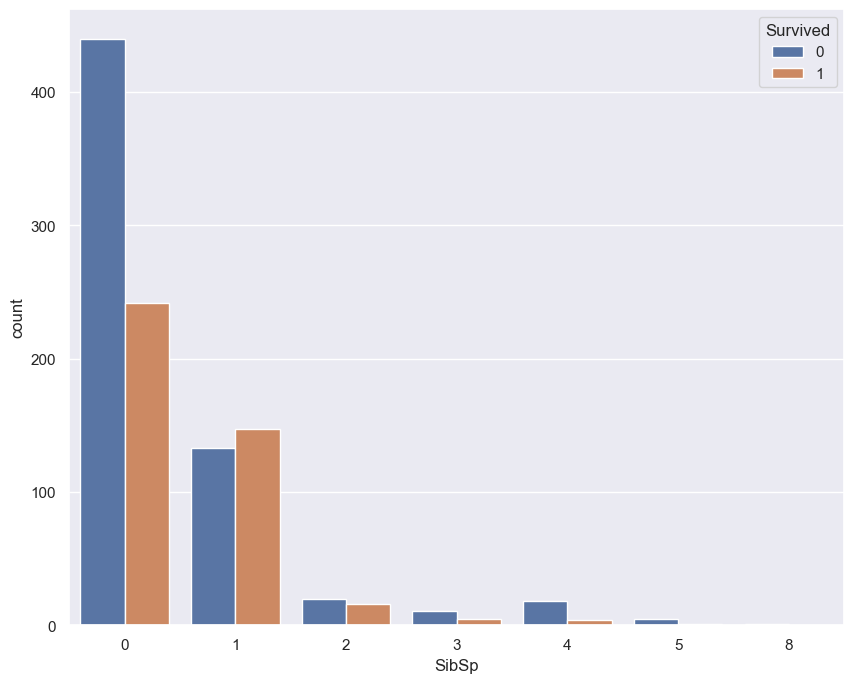

In [186]:
sns.countplot(x='SibSp', hue='Survived', data=df2)

---
### 📊 **Passenger Counts by Embarkation Port**



In [197]:
df2['Embarked'].value_counts()

Embarked
S    781
C    212
Q     50
Name: count, dtype: int64


- **Insights:**
    - **Southampton (S)** had the highest number of passengers, with a total of 781.
    - **Cherbourg (C)** followed with 212 passengers, indicating a significant but smaller representation compared to Southampton.
    - **Queenstown (Q)** had the least number of passengers, with only 50, highlighting its limited role as an embarkation point.

This distribution may reflect socio-economic factors and the demographics of passengers traveling on the Titanic.



<Axes: xlabel='Embarked', ylabel='count'>

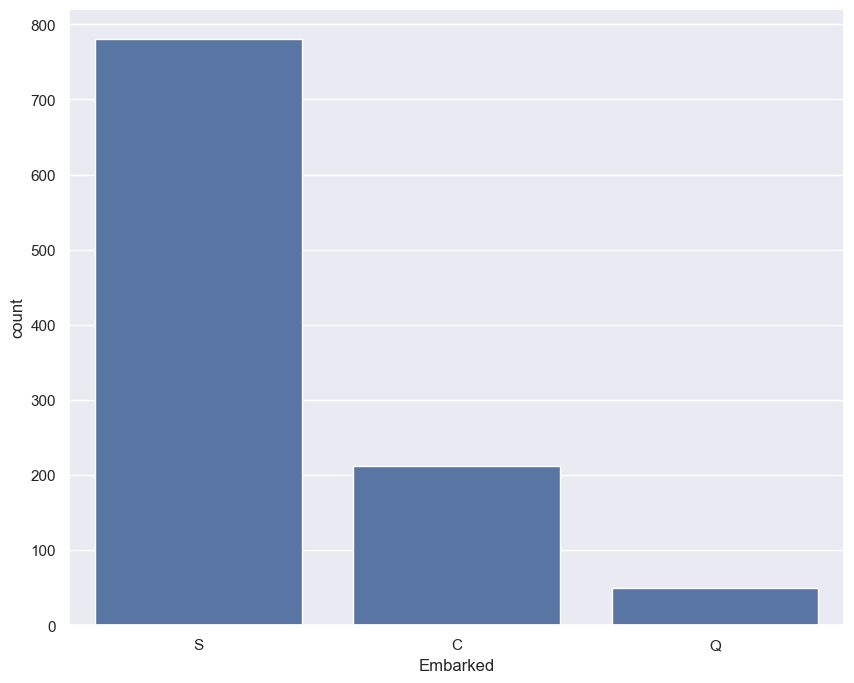

In [191]:
sns.countplot(x = 'Embarked', data = df2)

---
### **Survival Counts by Embarkation Port**





In [199]:
pd.crosstab(index = df['Embarked'],
           columns = df['Survived'])

Survived,0,1
Embarked,,
C,137,133
Q,69,54
S,609,305


- **Insights:**
    - **Cherbourg (C)**: Among the 270 passengers, 133 survived, resulting in a survival rate of approximately 49.2%.
    - **Queenstown (Q)**: Out of 123 passengers, 54 survived, giving a survival rate of about 43.9%.
    - **Southampton (S)**: Of the 914 passengers, 305 survived, leading to a survival rate of around 33.4%.

This data highlights the varying survival rates among passengers based on their embarkation ports, suggesting potential socio-economic and demographic influences on survival during the Titanic disaster.


<Axes: xlabel='Embarked', ylabel='count'>

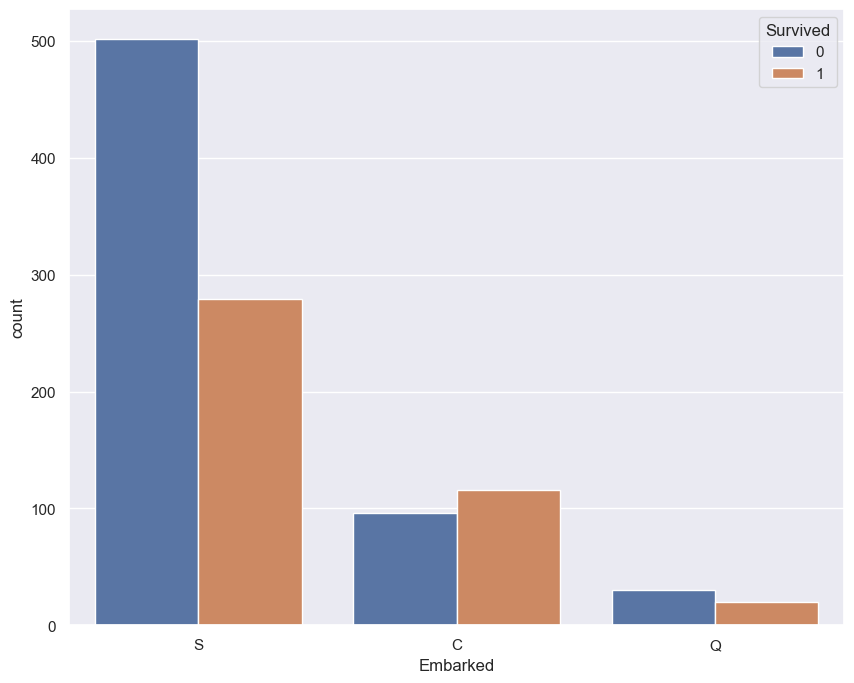

In [192]:
sns.countplot(x = 'Embarked', data = df2, hue = 'Survived')

---
### **Summary of Fare Statistics by Embarkation Port and Survival Status**



In [204]:
fare_summary = df2.groupby(['Embarked', 'Survived'])['Fare'].describe()
fare_summary.reset_index()

,Embarked,Survived,count,mean,std,min,25%,50%,75%,max
0,C,0,96.0,51.834376,62.834346,4.0125,11.71875,27.7208,72.27290,262.3750
1,C,1,116.0,89.555356,105.175876,7.2250,25.91250,58.6896,107.04375,512.3292
2,Q,0,30.0,15.732500,16.383796,6.7500,7.75000,7.8250,15.50000,90.0000
3,Q,1,20.0,16.166045,25.272921,6.9500,7.73330,7.7500,7.87920,90.0000
4,S,0,502.0,21.421603,27.854850,0.0000,7.89580,11.5000,26.00000,263.0000
5,S,1,279.0,40.370938,49.984596,0.0000,12.47500,25.7000,43.29375,263.0000


- **Cherbourg (C)**)
    - **Non-Survivors (0)**: 
      - Count: 96
      - Mean Fare: 51.83
      - Standard Deviation: 62.83
      - Minimum Fare: 4.01
      - Maximum Fare: 262.38

    - **Survivors (1)**:
      - Count: 116
      - Mean Fare: 89.56
      - Standard Deviation: 105.18
      - Minimum Fare: 7.23
      - Maximum Fare: 512.33

- **Queenstown (Q)**
    - **Non-Survivors (0)**: 
      - Count: 30
      - Mean Fare: 15.73
      - Standard Deviation: 16.38
      - Minimum Fare: 6.75
      - Maximum Fare: 90.00

    - **Survivors (1)**:
      - Count: 20
      - Mean Fare: 16.17
      - Standard Deviation: 25.27
      - Minimum Fare: 6.95
      - Maximum Fare: 90.00

- **Southampton (S)**
    - **Non-Survivors (0)**: 
      - Count: 502
      - Mean Fare: 21.42
      - Standard Deviation: 27.85
      - Minimum Fare: 0.00
      - Maximum Fare: 263.00

    - **Survivors (1)**:
      - Count: 279
      - Mean Fare: 40.37
      - Standard Deviation: 49.98
      - Minimum Fare: 0.00
      - Maximum Fare: 263.00

- **Insights:**
    - Passengers from **Cherbourg (C)** who survived had the highest average fare, suggesting a correlation between fare price and survival.
    - In contrast, **Queenstown (Q)** had lower fare averages and fewer passengers overall, which may indicate different demographics.
    - **Southampton (S)**, with the largest number of passengers, shows a significant disparity in average fares between survivors and non-survivors, which may reflect socioeconomic factors affecting survival chances.


<Axes: xlabel='Embarked', ylabel='Fare'>

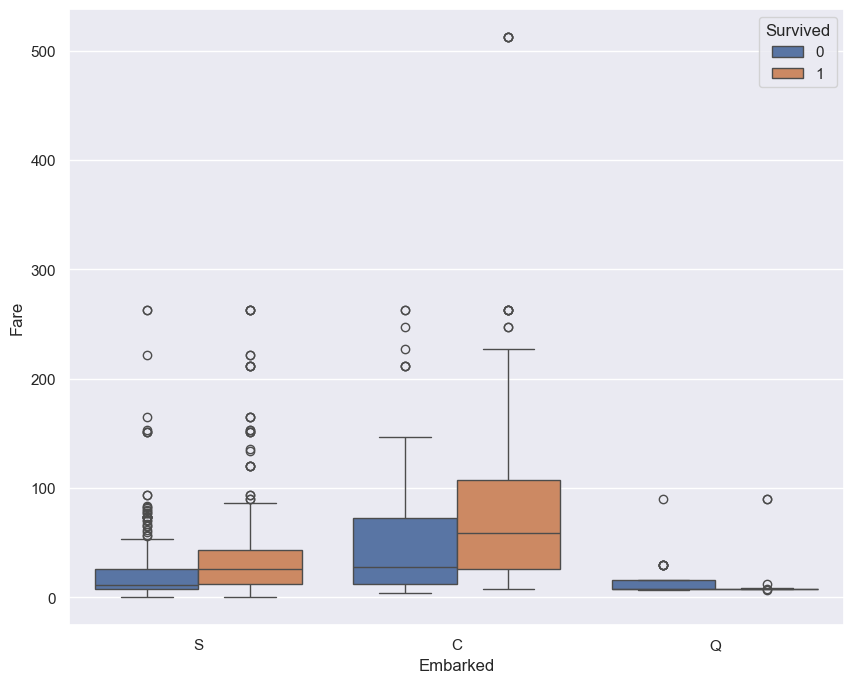

In [201]:
sns.boxplot(x = 'Embarked', y = 'Fare', hue = 'Survived', data = df2)

---
### Summary of Fare Statistics by Embarkation Port and Passenger Class



In [205]:
class_summary = df2.groupby(['Embarked', 'Pclass'])['Fare'].describe()
class_summary.reset_index()

,Embarked,Pclass,count,mean,std,min,25%,50%,75%,max
0,C,1,128.0,110.319434,99.282157,26.0000,55.44170,77.49795,134.500000,512.3292
1,C,2,24.0,24.703296,11.390070,12.0000,13.85830,24.00000,37.004200,41.5792
2,C,3,60.0,10.845912,4.403347,4.0125,7.22815,7.89580,14.455225,19.2583
3,Q,1,3.0,90.000000,0.000000,90.0000,90.00000,90.00000,90.000000,90.0000
4,Q,2,5.0,11.817500,1.190706,9.6875,12.35000,12.35000,12.350000,12.3500
5,Q,3,42.0,11.100200,7.640310,6.7500,7.73540,7.75000,7.879200,29.1250
6,S,1,151.0,77.100995,63.366864,0.0000,30.00000,53.10000,88.250000,263.0000
7,S,2,232.0,21.776724,13.798040,10.5000,13.00000,16.00000,26.000000,73.5000
8,S,3,398.0,13.373584,10.438281,0.0000,7.85420,8.05000,15.850000,69.5500


- **Cherbourg (C)**
  - **1st Class**: 
    - Count: 128
    - Mean Fare: 110.32
    - Standard Deviation: 99.28
    - Minimum Fare: 26.00
    - Maximum Fare: 512.33
  - **2nd Class**: 
    - Count: 24
    - Mean Fare: 24.70
    - Standard Deviation: 11.39
    - Minimum Fare: 12.00
    - Maximum Fare: 41.58
  - **3rd Class**: 
    - Count: 60
    - Mean Fare: 10.85
    - Standard Deviation: 4.40
    - Minimum Fare: 4.01
    - Maximum Fare: 19.26

- **Queenstown (Q)**
  - **1st Class**: 
    - Count: 3
    - Mean Fare: 90.00
    - Standard Deviation: 0.00
    - Minimum Fare: 90.00
    - Maximum Fare: 90.00
  - **2nd Class**: 
    - Count: 5
    - Mean Fare: 11.82
    - Standard Deviation: 1.19
    - Minimum Fare: 9.69
    - Maximum Fare: 12.35
  - **3rd Class**: 
    - Count: 42
    - Mean Fare: 11.10
    - Standard Deviation: 7.64
    - Minimum Fare: 6.75
    - Maximum Fare: 29.13

- **Southampton (S)**
  - **1st Class**: 
    - Count: 151
    - Mean Fare: 77.10
    - Standard Deviation: 63.37
    - Minimum Fare: 0.00
    - Maximum Fare: 263.00
  - **2nd Class**: 
    - Count: 232
    - Mean Fare: 21.78
    - Standard Deviation: 13.80
    - Minimum Fare: 10.50
    - Maximum Fare: 73.50
  - **3rd Class**: 
    - Count: 398
    - Mean Fare: 13.37
    - Standard Deviation: 10.44
    - Minimum Fare: 0.00
    - Maximum Fare: 69.55

- **Insights**:
  - Passengers in **1st Class** from **Cherbourg (C)** had the highest average fare, significantly exceeding that of passengers in **2nd** and **3rd Classes**.
  - The **1st Class** fares from **Queenstown (Q)** show very limited data due to the small count of passengers.
  - In **Southampton (S)**, the large number of **3rd Class** passengers had the lowest average fare, reflecting the economic diversity of the travelers on the Titanic.
  - Overall, the fare statistics reveal substantial disparities in travel class and the associated costs among passengers embarking from different ports.


<Axes: xlabel='Embarked', ylabel='Fare'>

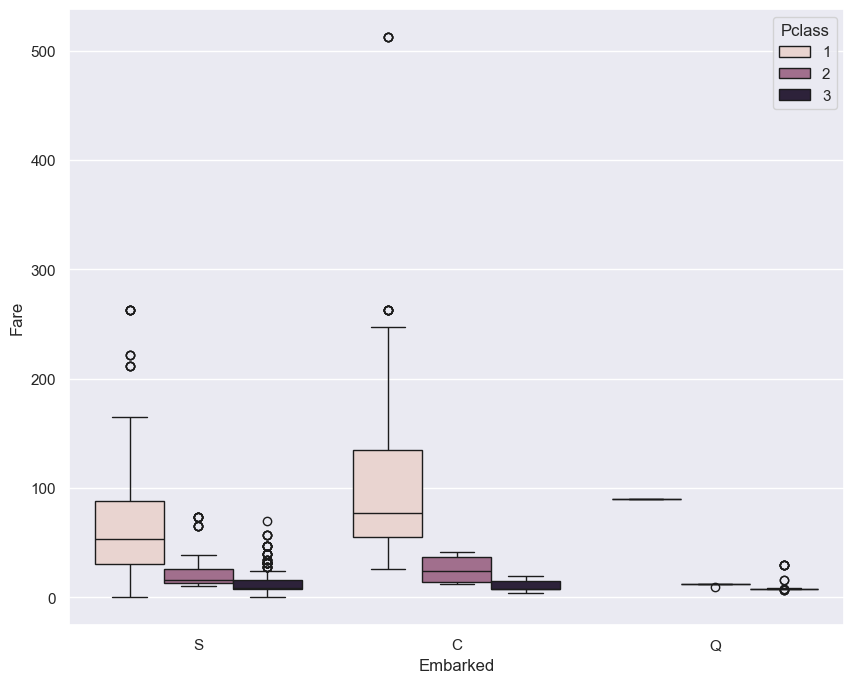

In [198]:
sns.boxplot(x = 'Embarked', y = 'Fare', hue = 'Pclass', data = df2)

---
---
## Feature Engineering

---

- **Dataset Summary**

    - The dataset contains 1,043 passengers. About 39.8% survived, with an average age of 29.8 years. Most passengers were in 3rd class (mean Pclass: 2.21). The average fare was 36.60, but fares varied widely, ranging from 0 to 512.33. Most passengers had no siblings/spouses (SibSp) or parents/children (Parch) aboard. Key percentiles show that half the passengers were 28 years old or younger, with a fare of 15.75 or less.



In [213]:
df2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,655.391179,0.397891,2.209012,29.813202,0.504314,0.421860,36.603024
std,377.527036,0.489697,0.840685,14.366254,0.913080,0.840655,55.753648
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,326.500000,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,662.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.750000
75%,973.500000,1.000000,3.000000,39.000000,1.000000,1.000000,35.077100
max,1307.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [214]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


---

### Dropped Useless Columns

- **Objective**: Improve the dataset by removing irrelevant or redundant columns.
- **Dropped Columns**:
  - **`PassengerId`**: Does not contribute to predictions or model performance.
  - **`Ticket`**: Unnecessary for analysis, contains arbitrary information.
  - **`Name`**: Not useful for machine learning models.
- **Reasoning**:
  - These columns do not hold predictive value and can introduce noise into the model.
  - Dropping them simplifies the dataset, focusing only on meaningful features for better model accuracy.


---

In [215]:
df3 = df2.drop(columns=['Ticket', 'Name', 'PassengerId'])
df3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


---
### Splitting the Data and Labels

- **Objective**: Separate the features (data) and the target variable (labels) to prepare for model training.
- **Data (`X`)**: Contains the independent variables or features that will be used as input for the model.
- **Labels (`y`)**: The target variable or dependent variable that the model will predict.
- **Reasoning**:
  - **Machine Learning Models** require distinct data (features) and labels (outcome) to learn patterns effectively.
  - This separation helps avoid **data leakage**, ensuring that the model does not unintentionally use label information during training.
- **Outcome**: The dataset is ready for further preprocessing and modeling, with `X` representing the input data and `y` holding the expected output or labels.


---

In [188]:
X = df3.drop(columns=['Survived'])
y = df3['Survived']

---
### One-Hot Encoding with `pd.get_dummies()`

- **Purpose**: Converts categorical variables into dummy/indicator variables.
- **Function**: `pd.get_dummies(X, drop_first=True, dtype=int)`
  - **`drop_first=True`**: Drops the first category to avoid multicollinearity (e.g., if a column has 3 unique categories, only 2 new columns will be created).
  - **`dtype=int`**: Ensures that the resulting dummy variables are of integer type (0 or 1).
  - This transformation helps in preparing the dataset for machine learning algorithms, particularly for models that cannot handle categorical data directly.
- **Result**: The dataset `X` will have categorical columns replaced by new columns representing the presence (1) or absence (0) of each category, excluding the first category.

---


---
### Data Before and After One-Hot Encoding

- **Before**:
  - The dataset contained categorical columns like `Sex` (male/female) and `Embarked` (C, Q, S).
  - These categorical values were not yet encoded, which could complicate modeling as most machine learning algorithms require numerical input.

- **After**:
  - `pd.get_dummies()` transformed categorical columns into multiple binary columns.
  - The `Sex` column was replaced with `Sex_male` (binary indicator: 1 for male, 0 for female).
  - The `Embarked` column was split into `Embarked_Q` and `Embarked_S`, with the absence of these categories represented as `0`.
  - This encoding allows the dataset to be fully numerical, suitable for machine learning algorithms.

---


In [220]:
X = pd.get_dummies(X, drop_first = True, dtype = int)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


---

# Model Training and Evaluation

- **Data Splitting**:
  - Used `train_test_split` from `sklearn.model_selection` to divide the dataset into training and testing sets.
  - This ensures the model is trained on one subset of the data and evaluated on another, unseen subset, improving generalization.

- **Models Applied**:
  - **Logistic Regression**: A linear model used for binary classification. It predicts the probability of the target variable based on a linear combination of the input features.
  - **Random Forest Classifier**: An ensemble model that builds multiple decision trees during training and outputs the majority class as the prediction. It reduces overfitting compared to a single decision tree.
  - **Decision Tree Classifier**: A non-linear model that makes decisions by splitting the dataset into branches based on feature values. It can be prone to overfitting if not controlled.
  - **K-Nearest Neighbors (KNN)**: A simple and intuitive model that classifies data points based on the majority class of the nearest neighbors in the feature space.

- **Evaluation Metrics**:
  - **Confusion Matrix**: Displays the number of correct and incorrect predictions in a matrix format, highlighting the performance across actual and predicted classes.
  - **Classification Report**: Provides detailed metrics such as precision, recall, F1-score, and support for each class, giving insights into model performance across various measures.

---


In [223]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [250]:
def get_confusion(actual, predicted):
    tp = 0;
    fn = 0;
    tn = 0;
    fp = 0;
    
    for i in range(len(actual)):
        if(actual.iloc[i] == 1 and predicted[i] == 1):
            tp+=1;
        elif(actual.iloc[i] == 0 and predicted[i] == 0):
            tn+=1
        elif(actual.iloc[i] == 1 and predicted[i] == 0):
            fn+=1
        elif(actual.iloc[i] == 0 and predicted[i] == 1):
            fp+=1
    
    print(f'Tp {tp}, Fn {fn}\nFp {fp}, Tn {tn}')

---
### Data Splitting for Training and Testing

- **Train-Test Split**:
  - The dataset was split into training and testing sets using `train_test_split` from `sklearn.model_selection`.
  - **Parameters**:
    - `test_size = 0.3`: 30% of the data was allocated for testing, while 70% was used for training.
    - `random_state = 2`: Ensures reproducibility of the data split.
  
- **Output Shapes**:
  - The code returns the shapes of the training and testing datasets, indicating how many samples and features are in each set:
    - `X_train.shape` and `y_train.shape`: The shape of the training feature set and labels.
    - `X_test.shape` and `y_test.shape`: The shape of the testing feature set and labels.

---


In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((730, 8), (730,), (313, 8), (313,))

---
## Logistic Regression

- **Logistic Regression** is used for binary classification problems.
- It predicts the probability of an event occurring by fitting data to a logistic function (S-shaped curve).
- **Advantages**:
  - Simple and easy to implement.
  - Provides probabilities for class membership.
  - Works well when the classes are linearly separable.
  
- **When to use**:
  - When you have a binary outcome (yes/no, true/false, survived/not survived).
  - When you want to interpret model coefficients to understand feature importance.

---

In [228]:
model_log = LogisticRegression(max_iter = 200)
model_log.fit(X_train, y_train)

LogisticRegression(max_iter=200)

### **For Train Dataset**

In [258]:
y_pred_train_log = model_log.predict(X_train)

---

### Confusion Matrix Analysis for Train Dataset(Logistic Regression)

The confusion matrix provides valuable insights into the performance of our classification model on the training data. The following key metrics can be derived:

- **True Positives (TP)**: 235  
  Instances that were correctly predicted as positive.

- **False Negatives (FN)**: 69  
  Instances that were incorrectly predicted as negative despite being positive.

- **False Positives (FP)**: 45  
  Instances that were incorrectly predicted as positive when they were actually negative.

- **True Negatives (TN)**: 381  
  Instances that were correctly predicted as negative.

The confusion matrix is visualized using a heatmap, which highlights the counts of actual versus predicted classifications. This visualization helps identify areas for improvement, such as reducing the number of false positives and false negatives, ultimately enhancing the model's accuracy and reliability.

--- 

Confusion matrix for training data (Logistic Reegression):


Text(92.25, 0.5, 'Actual')

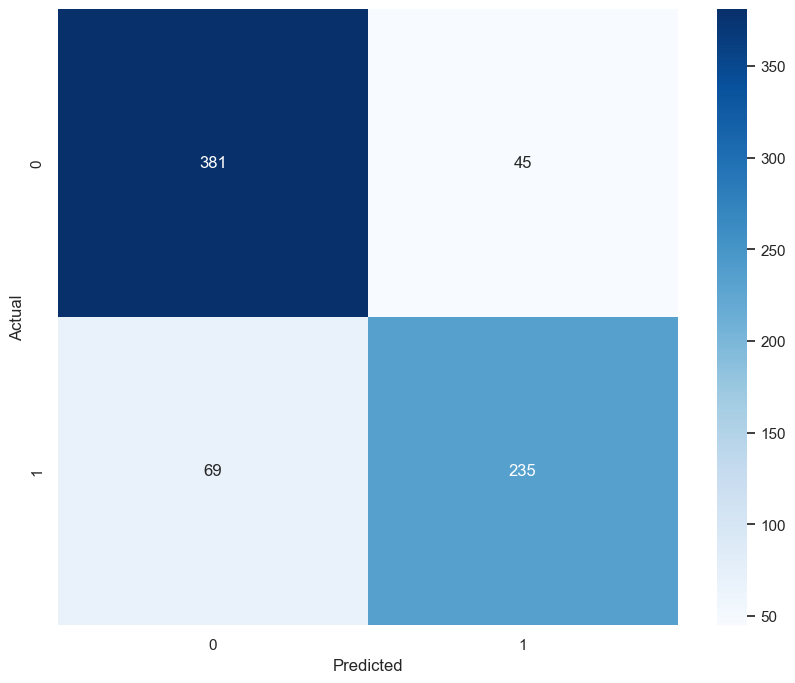

In [262]:
print('Confusion matrix for training data (Logistic Reegression):')
c = confusion_matrix(y_train, y_pred_train_log)
sns.heatmap(c, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

---
### Titanic Dataset: Classification Report Logistic Regression (Train Set)

- **Class 0 (Non-Survived)**: Precision: 0.85 | Recall: 0.89 | F1-Score: 0.87  
- **Class 1 (Survived)**: Precision: 0.84 | Recall: 0.77 | F1-Score: 0.80  
- **Overall Accuracy**: 84%

The model performs well in predicting non-survivors but has slightly lower recall for survivors, indicating some survivors are missed in predictions.

---

In [260]:
print(classification_report(y_train, y_pred_train_log))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       426
           1       0.84      0.77      0.80       304

    accuracy                           0.84       730
   macro avg       0.84      0.83      0.84       730
weighted avg       0.84      0.84      0.84       730



---
### **For Train Dataset**

In [261]:
y_pred_log = model_log.predict(X_test)

In [270]:
y_test.value_counts()

Survived
0    202
1    111
Name: count, dtype: int64

---
### Confusion Matrix Analysis for Test Set (Logistic Regression)

#### Key Takeaways:
- **True Negatives (TN = 188)**: 188 passengers who did not survive were correctly predicted as not surviving.
- **False Positives (FP = 14)**: 14 passengers who did not survive were incorrectly predicted as survivors.
- **False Negatives (FN = 25)**: 25 passengers who survived were incorrectly predicted as not surviving.
- **True Positives (TP = 86)**: 86 passengers who survived were correctly predicted as survivors.

### Summary:
- **High True Negative Rate**: The model is good at predicting passengers who did not survive (188 correct predictions).
- **Moderate True Positive Rate**: It correctly predicts 86 survivors but misses 25 survivors, showing room for improvement.

This matrix reflects the model's performance on unseen test data and gives insights into where the model is strong and where it needs refinement.

---

Confusion matrix for test set (Logistic Regression)


Text(92.25, 0.5, 'Actual')

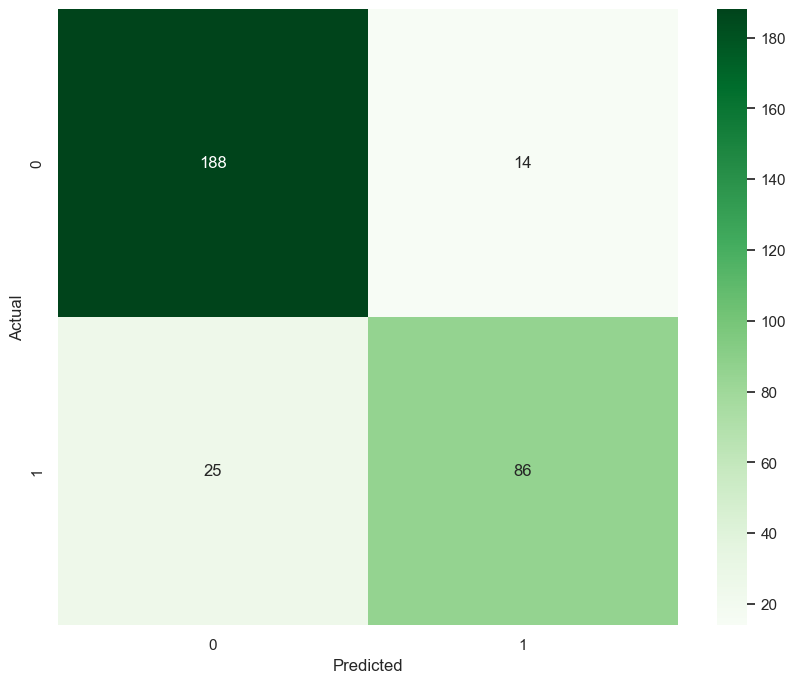

In [271]:
print('Confusion matrix for test set (Logistic Regression)')
c = confusion_matrix(y_test, y_pred_log)
sns.heatmap(c, annot = True, fmt = 'd', cmap = 'Greens')
plt.xlabel('Predicted'); plt.ylabel('Actual')

---

### Titanic Dataset: Classification Report Logistic Regression (Test Set)

- **Class 0 (Non-Survived)**: Precision: 0.88 | Recall: 0.93 | F1-Score: 0.91  
- **Class 1 (Survived)**: Precision: 0.86 | Recall: 0.77 | F1-Score: 0.82  
- **Overall Accuracy**: 88%

The model demonstrates strong performance in predicting non-survivors with high precision and recall, while the recall for survivors is moderate, suggesting a few survivors may be incorrectly classified as non-survivors.

---

In [273]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       202
           1       0.86      0.77      0.82       111

    accuracy                           0.88       313
   macro avg       0.87      0.85      0.86       313
weighted avg       0.87      0.88      0.87       313



---

## Random Forest Classifier

- **Random Forest** is an ensemble learning method used for classification and regression tasks.
- It builds multiple decision trees and merges them to improve accuracy and prevent overfitting.
- **Advantages**:
  - Handles large datasets with higher dimensionality.
  - Reduces overfitting by averaging multiple trees.
  - Can capture complex patterns and interactions between features.

- **When to use**:
  - When you need higher accuracy for complex datasets with many features.
  - When your data has non-linear relationships.
  - Suitable for both classification and regression tasks.

---

In [286]:
model_forest = RandomForestClassifier(n_estimators = 100)
model_forest.fit(X_train, y_train)

RandomForestClassifier()

### **For Train Dataset**

In [287]:
y_pred_train_forest = model_forest.predict(X_train)

---

### Confusion Matrix Analysis for Train Dataset(Random Forest Classifier)

- **Non-Survived (0)**: 426 True Negatives, 0 False Positives  
- **Survived (1)**: 298 True Positives, 6 False Negatives

Looks like Random Forest crushed it! 🌲 With only **2 false alarms** and **4 missed survivors**, it nailed down most of the predictions accurately. Almost no room for error on this one! 🏆

---

Confusion matrix for training data (Random Forest Classifier):
[[426   0]
 [  6 298]]


Text(92.25, 0.5, 'Actual')

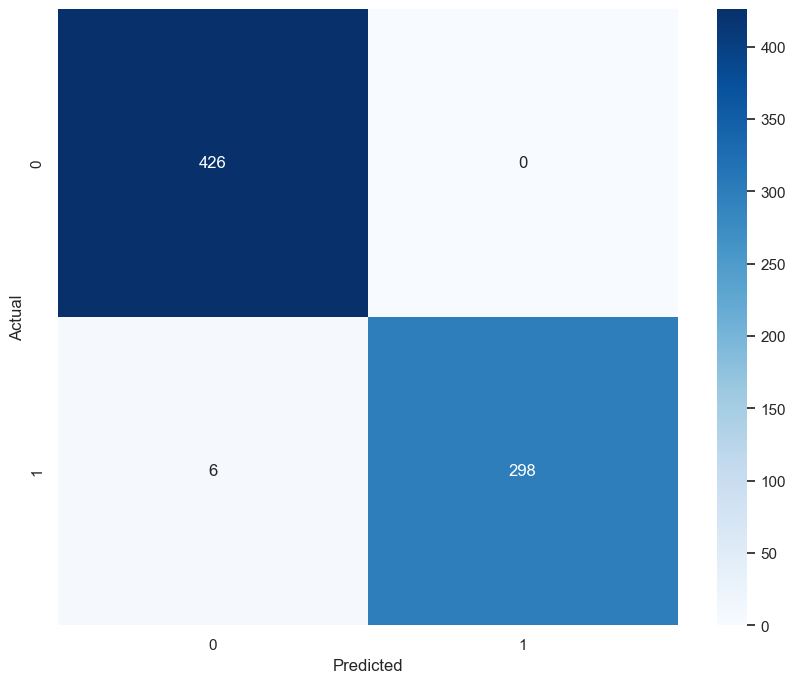

In [300]:
print('Confusion matrix for training data (Random Forest Classifier):')
c = confusion_matrix(y_train, y_pred_train_forest)
print(c)
sns.heatmap(c, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

---

### Titanic Dataset: Classification Report Random Forest Classifier (Train Set)

- **Class 0 (Non-Survived)**: Precision: 0.99 | Recall: 1.00 | F1-Score: 0.99  
- **Class 1 (Survived)**: Precision: 1.00 | Recall: 0.98 | F1-Score: 0.99  
- **Overall Accuracy**: 99%

The Random Forest model delivers near-perfect performance, with almost no misclassifications for either survivors or non-survivors. It’s highly reliable for this dataset!

---

In [289]:
print(classification_report(y_train, y_pred_train_forest))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       426
           1       1.00      0.98      0.99       304

    accuracy                           0.99       730
   macro avg       0.99      0.99      0.99       730
weighted avg       0.99      0.99      0.99       730



## For Test Dataset

In [290]:
y_pred_forest = model_forest.predict(X_test)

---

### Confusion Matrix Analysis for Test Dataset(Random Forest Classifier)

- **True Negatives (TN)**: 177 cases correctly predicted as non-survivors.
- **False Positives (FP)**: 25 cases incorrectly predicted as survivors, but they did not survive.
- **False Negatives (FN)**: 27 cases incorrectly predicted as non-survivors, but they survived.
- **True Positives (TP)**: 84 cases correctly predicted as survivors.

The model's performance on the test set is slightly less accurate than on the training set, with some misclassification of survivors and non-survivors.

---

Confusion matrix for testing data (Random Forest Classifier):
[[177  25]
 [ 27  84]]


Text(92.25, 0.5, 'Actual')

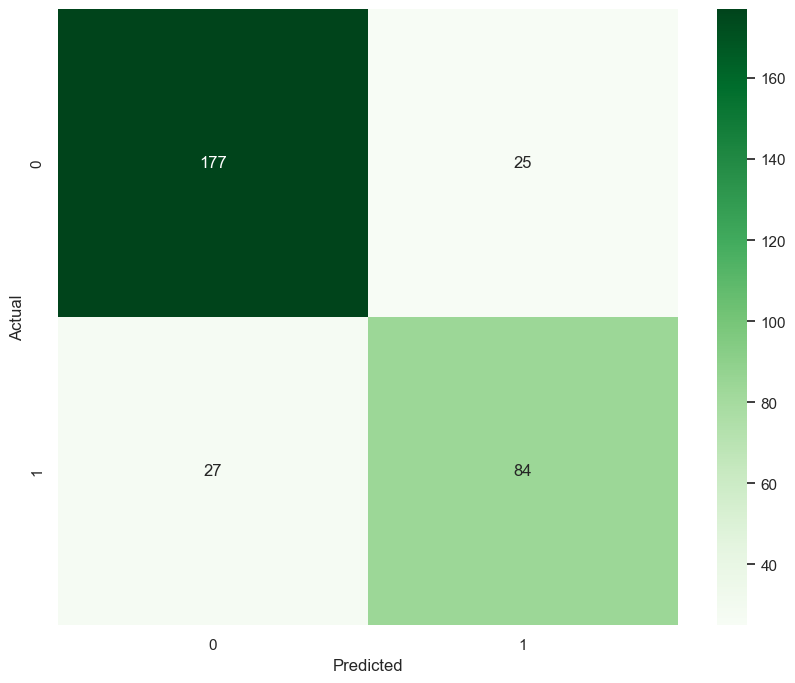

In [301]:
print('Confusion matrix for testing data (Random Forest Classifier):')
c = confusion_matrix(y_test, y_pred_forest)
print(c)
sns.heatmap(c, annot = True, fmt = 'd', cmap = 'Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')

---

### Titanic Dataset: Classification Report Random Forest Classifier (Test Set)

- **Class 0 (Non-Survived)**: Precision: 0.87 | Recall: 0.88 | F1-Score: 0.87  
- **Class 1 (Survived)**: Precision: 0.77 | Recall: 0.76 | F1-Score: 0.76  
- **Overall Accuracy**: 83%

The classifier performs well in predicting non-survivors but shows lower precision and recall for predicting survivors, leading to some misclassification in this category.

---

In [292]:
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       202
           1       0.77      0.76      0.76       111

    accuracy                           0.83       313
   macro avg       0.82      0.82      0.82       313
weighted avg       0.83      0.83      0.83       313



---

## Decision Tree Classifier

- **Decision Tree Classifier** is a simple and interpretable model used for classification and regression tasks.
- It splits the data into subsets based on feature values, constructing a tree-like structure where each node represents a decision.
  
- **Advantages**:
  - Easy to understand and interpret.
  - Can handle both numerical and categorical data.
  - Requires little data preprocessing.
  
- **When to use**:
  - When you need a model that's easy to explain.
  - When you have complex interactions between features.
  - When interpretability is important.

---

In [294]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

## For Train Dataset

In [296]:
y_pred_train_tree = model_tree.predict(X_train)



---

### Confusion Matrix Analysis for Train Dataset (Decision Tree Classifier)

- **Non-Survived (0)**: 426 True Negatives, 0 False Positives  
- **Survived (1)**: 298 True Positives, 6 False Negatives

The Decision Tree Classifier performs exceptionally well on the training data. With **no false positives** and only **6 missed survivors**, it’s capturing almost every instance with great accuracy! 🎯

---



Confusion matrix for training data (Decision Tree Classifier):
[[426   0]
 [  6 298]]


Text(92.25, 0.5, 'Actual')

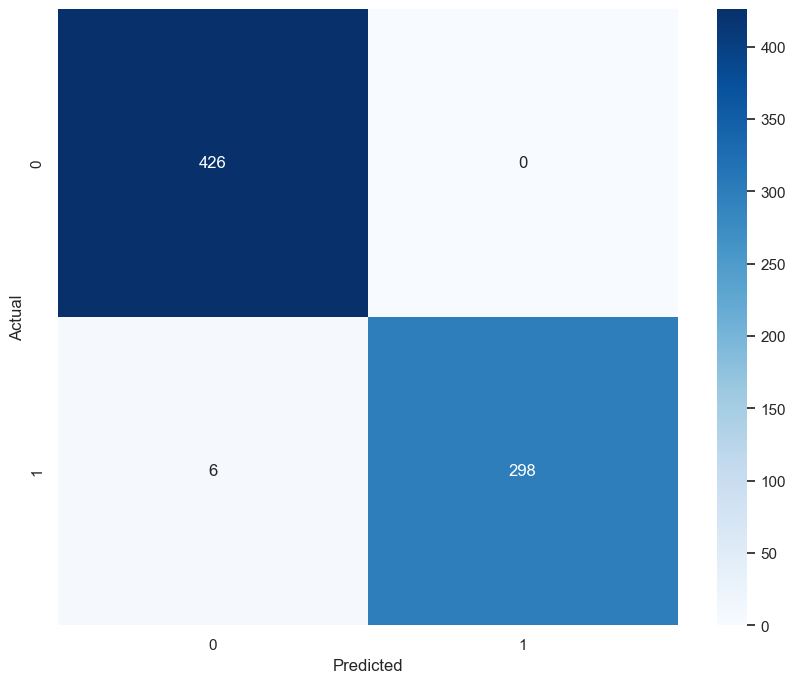

In [303]:
print('Confusion matrix for training data (Decision Tree Classifier):')
c = confusion_matrix(y_train, y_pred_train_tree)
print(c)
sns.heatmap(c, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

---

### Titanic Dataset: Classification Report Decision Tree Classifier (Train Set)

- **Class 0 (Non-Survived)**: Precision: 0.99 | Recall: 1.00 | F1-Score: 0.99  
- **Class 1 (Survived)**: Precision: 1.00 | Recall: 0.98 | F1-Score: 0.99  
- **Overall Accuracy**: 99%

The model demonstrates almost perfect precision and recall, meaning it accurately predicts survivors and non-survivors with minimal errors, making it highly effective on the training data.

---

In [302]:
print(classification_report(y_train, y_pred_train_tree))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       426
           1       1.00      0.98      0.99       304

    accuracy                           0.99       730
   macro avg       0.99      0.99      0.99       730
weighted avg       0.99      0.99      0.99       730



## For Test Dataset

In [304]:
y_pred_tree = model_tree.predict(X_test)

---

### Confusion Matrix Analysis for Test Dataset (Decision Tree Classifier)

- **Non-Survived (0)**: 163 True Negatives, 39 False Positives  
- **Survived (1)**: 83 True Positives, 28 False Negatives

The Decision Tree model performs well but makes **39 false predictions** for non-survivors and **28 missed predictions** for survivors. This shows that while it captures patterns in the data, it still struggles with correctly classifying some test cases, particularly with survivors.

---

Confusion matrix for testing data (Decision Tree Classifier):
[[163  39]
 [ 28  83]]


Text(92.25, 0.5, 'Actual')

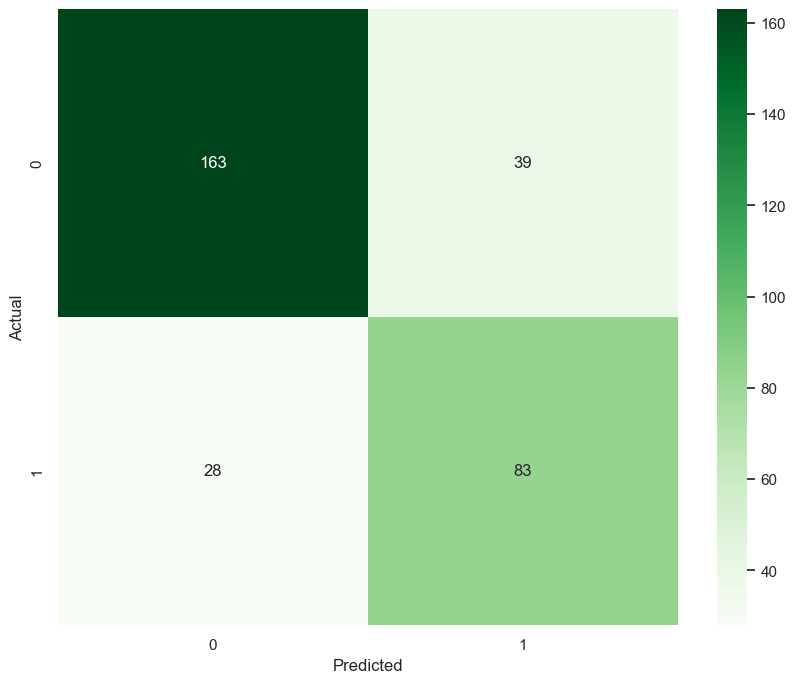

In [305]:
print('Confusion matrix for testing data (Decision Tree Classifier):')
c = confusion_matrix(y_test, y_pred_tree)
print(c)
sns.heatmap(c, annot = True, fmt = 'd', cmap = 'Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')

---

### Titanic Dataset: Classification Report Decision Tree Classifier (Test Set)

- **Class 0 (Non-Survived)**: Precision: 0.85 | Recall: 0.81 | F1-Score: 0.83  
- **Class 1 (Survived)**: Precision: 0.68 | Recall: 0.75 | F1-Score: 0.71  
- **Overall Accuracy**: 79%

While the model performs well for non-survivors, with high precision and recall, it shows slightly lower performance when predicting survivors. This suggests some difficulty in correctly classifying survivors in the test set.

---



In [308]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       202
           1       0.68      0.75      0.71       111

    accuracy                           0.79       313
   macro avg       0.77      0.78      0.77       313
weighted avg       0.79      0.79      0.79       313



---

## K-Nearest Neighbors (KNN) Classifier

*   **K-Nearest Neighbors (KNN)** is a non-parametric, instance-based learning algorithm used for classification and regression.
    
*   It classifies new data points based on the majority class of their nearest neighbors in the feature space.
    
*   **Advantages**:
    
    *   Simple and intuitive to implement.
    *   No training phase, making it fast in small datasets.
    *   Works well with small, well-labeled datasets.
    
*   **When to use**:
    
    *   When you have a small amount of labeled data.
    *   When the decision boundary is non-linear.
    *   When you prefer a lazy learning algorithm that doesn't require training.

---

In [309]:
model_K = KNeighborsClassifier()
model_K.fit(X_train, y_train)

KNeighborsClassifier()

In [313]:
y_pred_train_K = model_K.predict(X_train)
y_pred_K = model_K.predict(X_test)

In [314]:
confusion_matrix(y_train, y_pred_train_K)

array([[353,  73],
       [ 94, 210]], dtype=int64)

In [315]:
model_K.score(X_train, y_train)

0.7712328767123288

In [316]:
confusion_matrix(y_test, y_pred_K)

array([[152,  50],
       [ 54,  57]], dtype=int64)

In [317]:
model_K.score(X_test, y_test)

0.6677316293929713

In [324]:
scores_train = []
scores_test = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    scores_train.append((i, knn.score(X_train, y_train)))    
    scores_test.append((i, knn.score(X_test, y_test)))

In [325]:
scores_train

[(1, 0.9917808219178083),
 (2, 0.8123287671232877),
 (3, 0.8191780821917808),
 (4, 0.7890410958904109),
 (5, 0.7712328767123288),
 (6, 0.7589041095890411),
 (7, 0.7547945205479452),
 (8, 0.736986301369863),
 (9, 0.736986301369863),
 (10, 0.7273972602739726),
 (11, 0.7356164383561644),
 (12, 0.7191780821917808),
 (13, 0.7205479452054795),
 (14, 0.7109589041095891),
 (15, 0.7095890410958904),
 (16, 0.7109589041095891),
 (17, 0.7041095890410959),
 (18, 0.6958904109589041),
 (19, 0.7013698630136986)]

In [326]:
scores_test

[(1, 0.645367412140575),
 (2, 0.6741214057507987),
 (3, 0.6549520766773163),
 (4, 0.65814696485623),
 (5, 0.6677316293929713),
 (6, 0.6741214057507987),
 (7, 0.670926517571885),
 (8, 0.6869009584664537),
 (9, 0.670926517571885),
 (10, 0.65814696485623),
 (11, 0.6517571884984026),
 (12, 0.6613418530351438),
 (13, 0.6549520766773163),
 (14, 0.6677316293929713),
 (15, 0.645367412140575),
 (16, 0.6741214057507987),
 (17, 0.6677316293929713),
 (18, 0.6677316293929713),
 (19, 0.670926517571885)]